# Rasch Model Analysis (CML Estimation) and Visualization
This notebook performs Rasch analysis using Conditional Maximum Likelihood Estimation (CMLE) via the `rasch_cmle` module.
It visualizes the results including Item Fit Statistics, Wright Maps, and Measure Distributions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Add current directory to path
sys.path.append(os.getcwd())

import rasch_cmle
import draw_writemap
import draw_pathway

sns.set_theme(style="whitegrid")

In [2]:
# Run the CMLE Rasch Analysis
print("Running Rasch CMLE Analysis...")
items_df, persons_df = rasch_cmle.rasch_cmle('blot.txt')

print("Analysis Complete.")
print(f"Items: {items_df.shape}")
print(f"Persons: {persons_df.shape}")

Running Rasch CMLE Analysis...
Loading Data from blot.txt...
Data Loaded. Shape: (150, 35)
Calibration Sample: 147 persons (excluding extreme scores)
Estimating Item Parameters (CMLE)...

Estimating Person Measures...
Computing Fit Statistics...

Calibration Results (First 5 items):
    ItemIndex         ItemName  Difficulty        SE  InfitMNSQ  OutfitMNSQ  \
20         21    21_Correl+neg    2.218730  0.196031   1.227125    1.569032   
27         28      28_Non-impl    1.577617  0.189518   1.099473    1.187060   
31         32  32_NegRecipImpl    1.106666  0.190663   0.951245    0.829677   
29         30         30_Equiv    1.000075  0.191667   1.180412    1.117345   
12         13     13_RecipExcl    0.898711  0.192891   1.163307    1.304128   

     Infit_t  Outfit_t  PtMeasureCorr  
20  2.353262  3.201172       0.319381  
27  1.242464  1.349244       0.428319  
31 -0.610302 -1.149607       0.532364  
29  2.191344  0.769840       0.383161  
12  1.965401  1.738400       0.368774  



In [3]:
# Display Item Statistics
print("Item Statistics (Top 10 sorted by Difficulty):")
# Show specific columns
cols = ['ItemIndex', 'ItemName', 'Difficulty', 'SE', 'InfitMNSQ', 'OutfitMNSQ', 'Infit_t', 'PtMeasureCorr']
display(items_df[cols].head(10))

print("\nPerson Measures (Top 5):")
display(persons_df.head())

Item Statistics (Top 10 sorted by Difficulty):


,ItemIndex,ItemName,Difficulty,SE,InfitMNSQ,OutfitMNSQ,Infit_t,PtMeasureCorr
20,21,21_Correl+neg,2.218730,0.196031,1.227125,1.569032,2.353262,0.319381
27,28,28_Non-impl,1.577617,0.189518,1.099473,1.187060,1.242464,0.428319
31,32,32_NegRecipImpl,1.106666,0.190663,0.951245,0.829677,-0.610302,0.532364
29,30,30_Equiv,1.000075,0.191667,1.180412,1.117345,2.191344,0.383161
12,13,13_RecipExcl,0.898711,0.192891,1.163307,1.304128,1.965401,0.368774
14,15,15_RecipImpl,0.869436,0.193294,0.974809,0.838751,-0.288887,0.523332
7,8,8_Correlat,0.783561,0.194606,0.912654,0.993393,-1.070597,0.526536
25,26,26_ComplAff,0.679736,0.196458,0.906760,0.745453,-1.114778,0.555075
2,3,3_Implicat,0.639244,0.197261,0.988845,0.896163,-0.102887,0.493240
24,25,25_ComplNeg,0.513481,0.200050,1.055273,1.195982,0.640441,0.397758



Person Measures (Top 5):


,PersonID,RawScore,Measure
0,001,29,1.792786
1,002,34,3.878114
2,003,29,1.792786
3,004,34,3.878114
4,005,33,3.124229


Generating Wright Map...


C:\Users\yongd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:383: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(n - .5, -.5, auto=None)


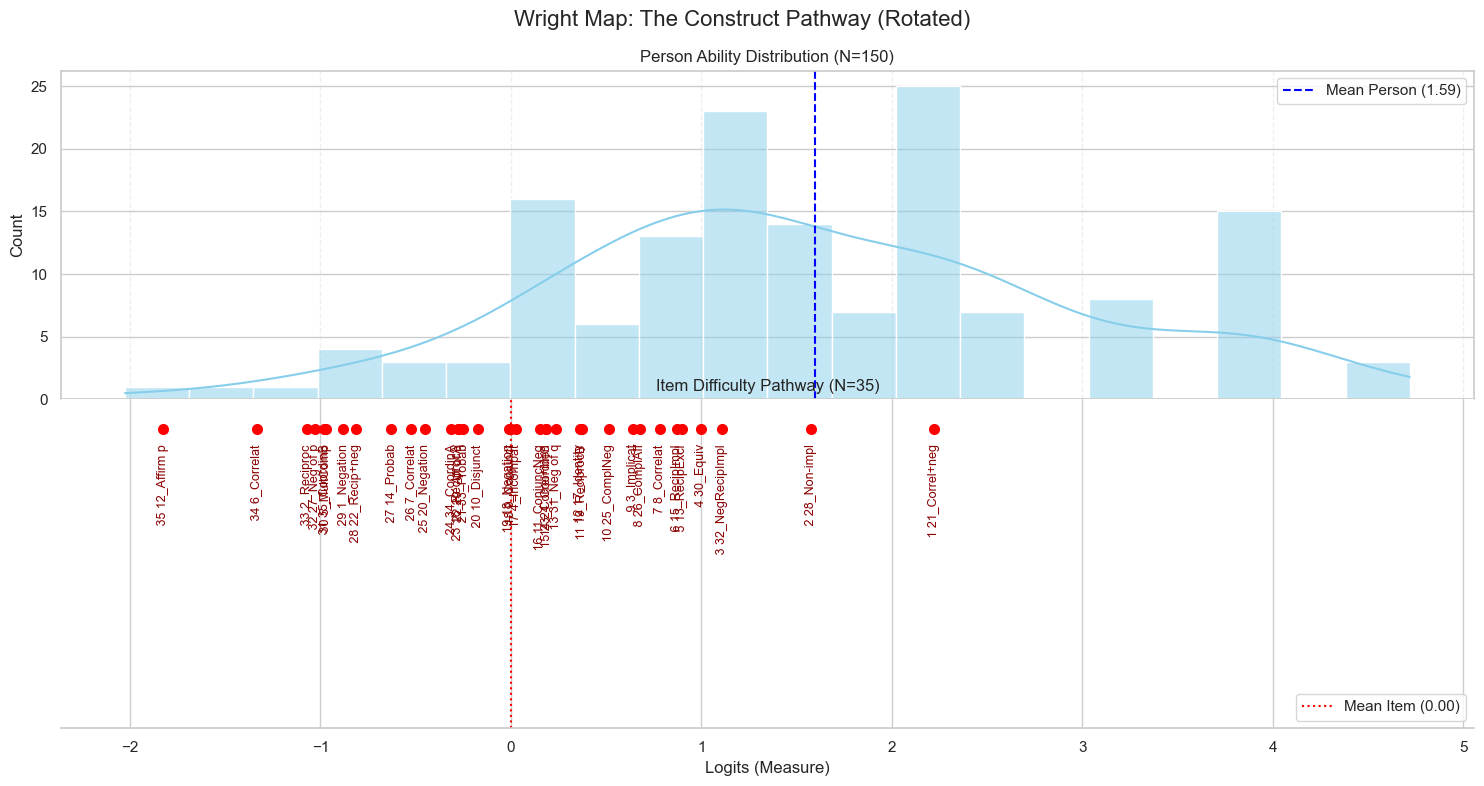

In [4]:
# 1. Wright Map (Variable Map)
# Visualize the distribution of Person Ability vs Item Difficulty
print("Generating Wright Map...")
if persons_df is not None and items_df is not None:
    draw_writemap.draw_wright_map(
        persons_df['Measure'].values, 
        items_df['Difficulty'].values, 
        items_df['ItemName'].values
    )
else:
    print("Error: No data available for plotting.")

Generating Fit Pathway Plot (Items Only)...


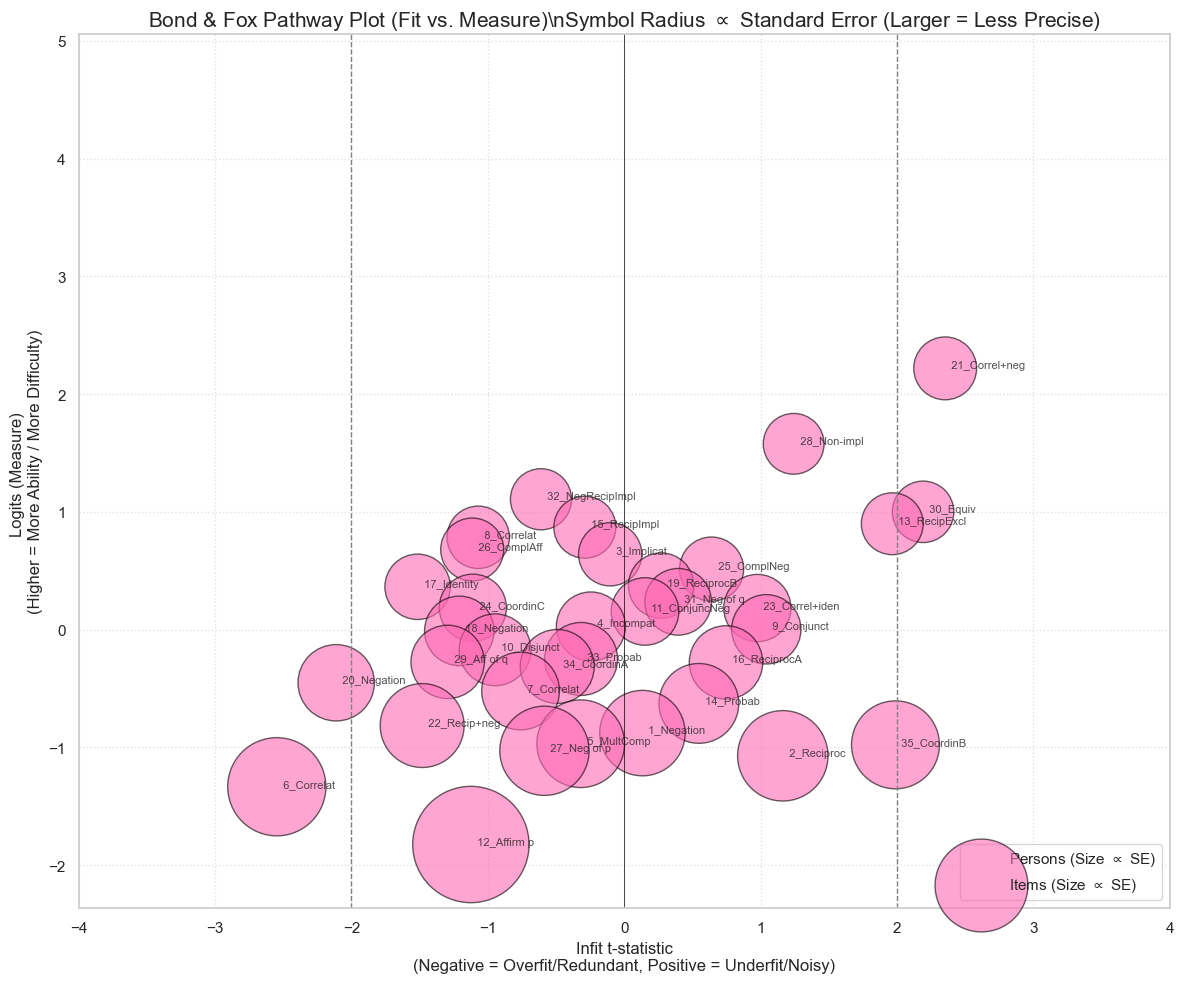

In [5]:
# 2. Bond & Fox Pathway Plot (Fit vs Measure)
# Plots items on a map of Measure (Y) vs Infit t-statistic (X)
print("Generating Fit Pathway Plot (Items Only)...")

if items_df is not None:
    # Note: We don't have person fit stats from this specific CMLE implementation yet, 
    # so we pass zeros for persons to suppress them or plot simplified versions.
    # The draw_pathway function handles both.
    
    draw_pathway.draw_pathway(
        person_locations=persons_df['Measure'].values,
        person_fits=np.zeros(len(persons_df)), # Placeholder
        person_se=np.zeros(len(persons_df)),   # Placeholder
        item_locations=items_df['Difficulty'].values,
        item_fits=items_df['Infit_t'].values,
        item_se=items_df['SE'].values,
        item_labels=items_df['ItemName'].values,
        base_size=100
    )

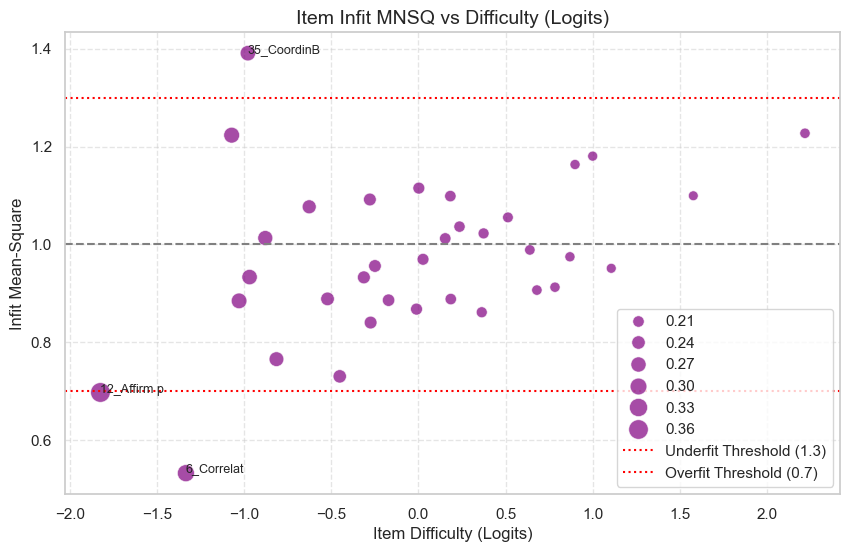

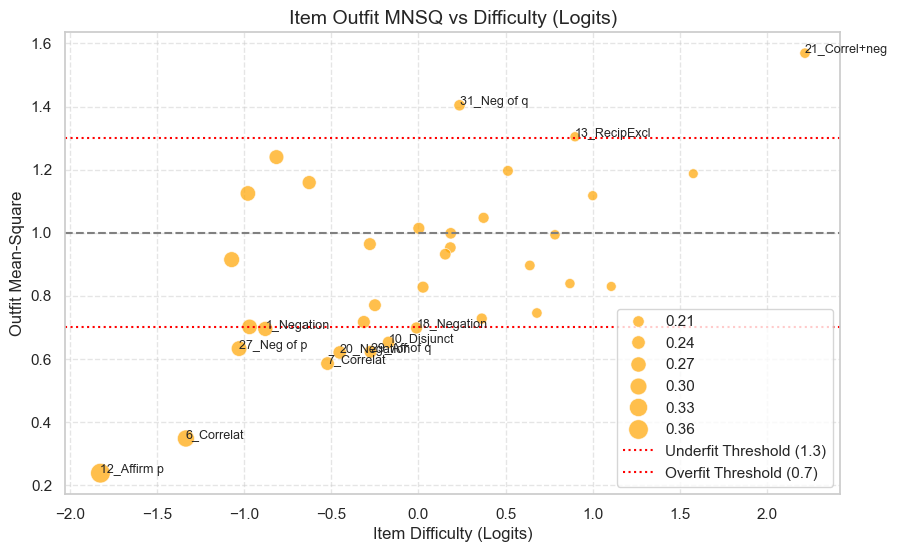

In [6]:
# 3. Item Fit Scatter Plot
# Infit MNSQ vs Difficulty
if items_df is not None:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=items_df, x='Difficulty', y='InfitMNSQ', size='SE', sizes=(50, 200), alpha=0.7, color='purple')
    
    # Guidelines
    plt.axhline(1.0, color='gray', linestyle='--')
    plt.axhline(1.3, color='red', linestyle=':', label='Underfit Threshold (1.3)')
    plt.axhline(0.7, color='red', linestyle=':', label='Overfit Threshold (0.7)')
    
    # Annotate Misfitting Items
    misfit = items_df[(items_df['InfitMNSQ'] > 1.3) | (items_df['InfitMNSQ'] < 0.7)]
    for i, row in misfit.iterrows():
        plt.text(row['Difficulty'], row['InfitMNSQ'], row['ItemName'], fontsize=9)
        
    plt.title("Item Infit MNSQ vs Difficulty (Logits)", fontsize=14)
    plt.xlabel("Item Difficulty (Logits)")
    plt.ylabel("Infit Mean-Square")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    # Outfit MNSQ vs Difficulty
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=items_df, x='Difficulty', y='OutfitMNSQ', size='SE', sizes=(50, 200), color='orange', alpha=0.7)
    
    # Guidelines
    plt.axhline(1.0, color='gray', linestyle='--')
    plt.axhline(1.3, color='red', linestyle=':', label='Underfit Threshold (1.3)')
    plt.axhline(0.7, color='red', linestyle=':', label='Overfit Threshold (0.7)')
    
    # Annotate Misfitting Items
    misfit_out = items_df[(items_df['OutfitMNSQ'] > 1.3) | (items_df['OutfitMNSQ'] < 0.7)]
    for i, row in misfit_out.iterrows():
        plt.text(row['Difficulty'], row['OutfitMNSQ'], row['ItemName'], fontsize=9)
        
    plt.title("Item Outfit MNSQ vs Difficulty (Logits)", fontsize=14)
    plt.xlabel("Item Difficulty (Logits)")
    plt.ylabel("Outfit Mean-Square")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

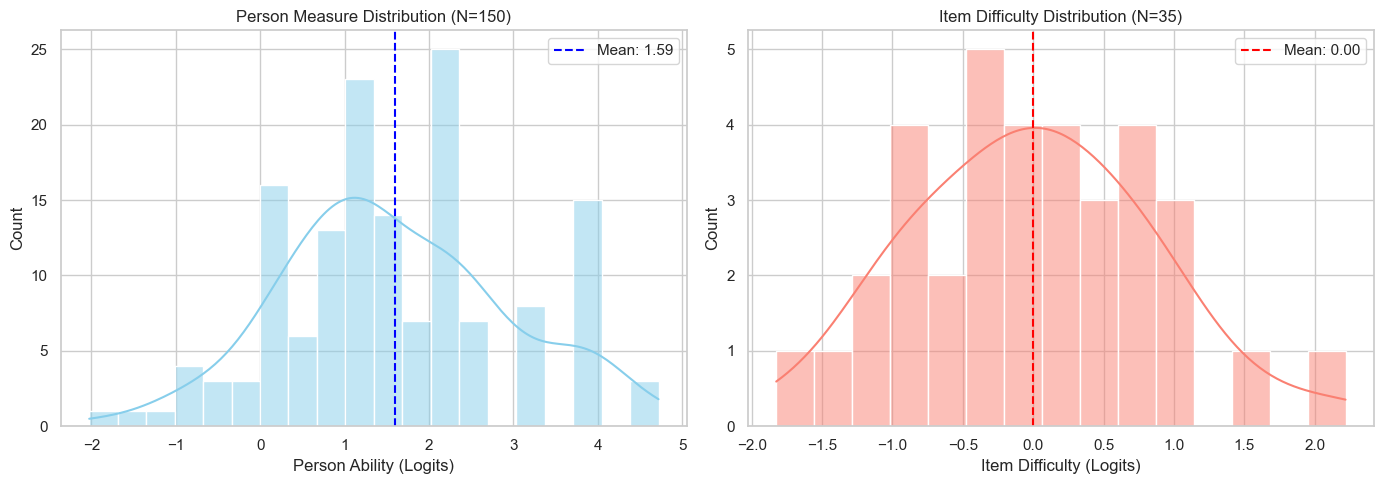

In [7]:
# 4. Distribution of Measures
if persons_df is not None:
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    sns.histplot(persons_df['Measure'], kde=True, ax=ax[0], color='skyblue', bins=20)
    ax[0].set_title(f'Person Measure Distribution (N={len(persons_df)})')
    ax[0].set_xlabel('Person Ability (Logits)')
    ax[0].axvline(persons_df['Measure'].mean(), color='blue', linestyle='--', label=f"Mean: {persons_df['Measure'].mean():.2f}")
    ax[0].legend()

    sns.histplot(items_df['Difficulty'], kde=True, ax=ax[1], color='salmon', bins=15)
    ax[1].set_title(f'Item Difficulty Distribution (N={len(items_df)})')
    ax[1].set_xlabel('Item Difficulty (Logits)')
    ax[1].axvline(items_df['Difficulty'].mean(), color='red', linestyle='--', label=f"Mean: {items_df['Difficulty'].mean():.2f}")
    ax[1].legend()

    plt.tight_layout()
    plt.show()